<a href="https://colab.research.google.com/github/RuolinZheng08/cmsc25460-optimization/blob/master/HW5_grad_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smooth Gradient Descent

In this notebook you will solve least squares for the boston housing dataset using smooth gradient descent.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Find the smoothness of the function $\frac{1}{2}\|Ax - y\|_2^2$ and code smooth gradient descent.

65525
(65527, 2)


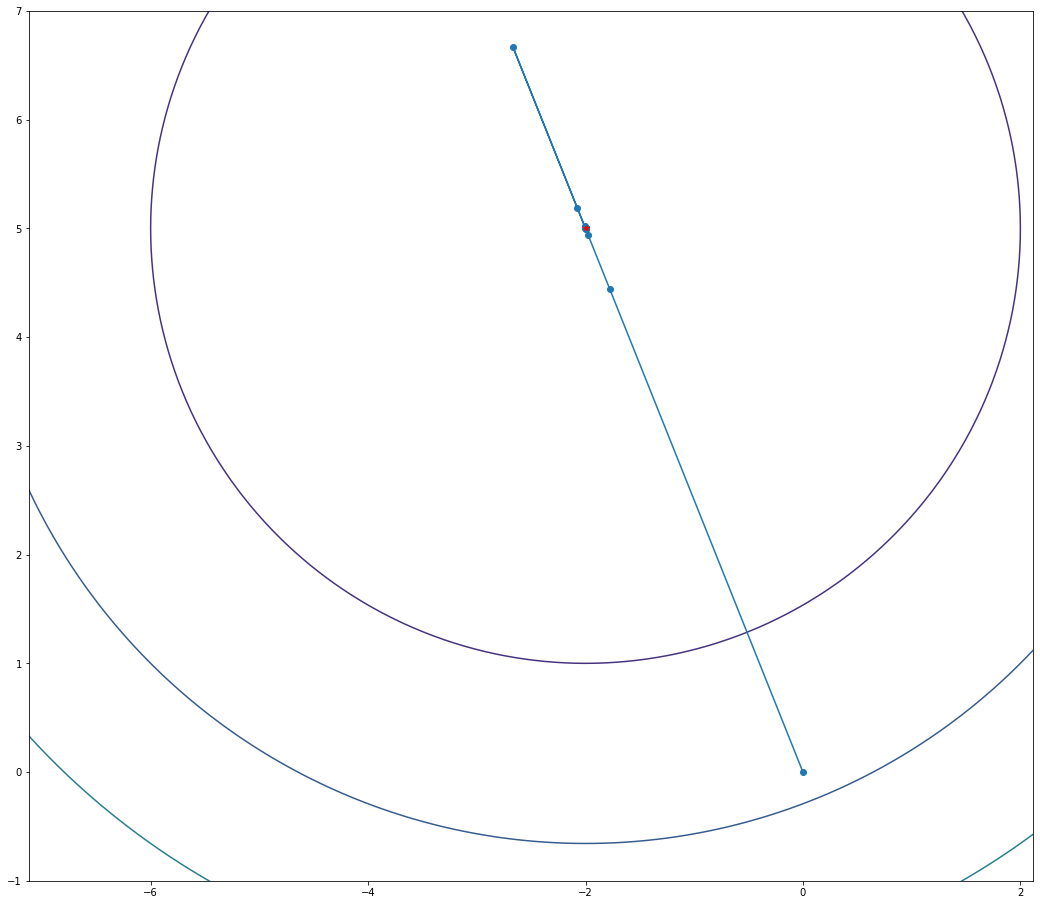

65525
(65527, 2)


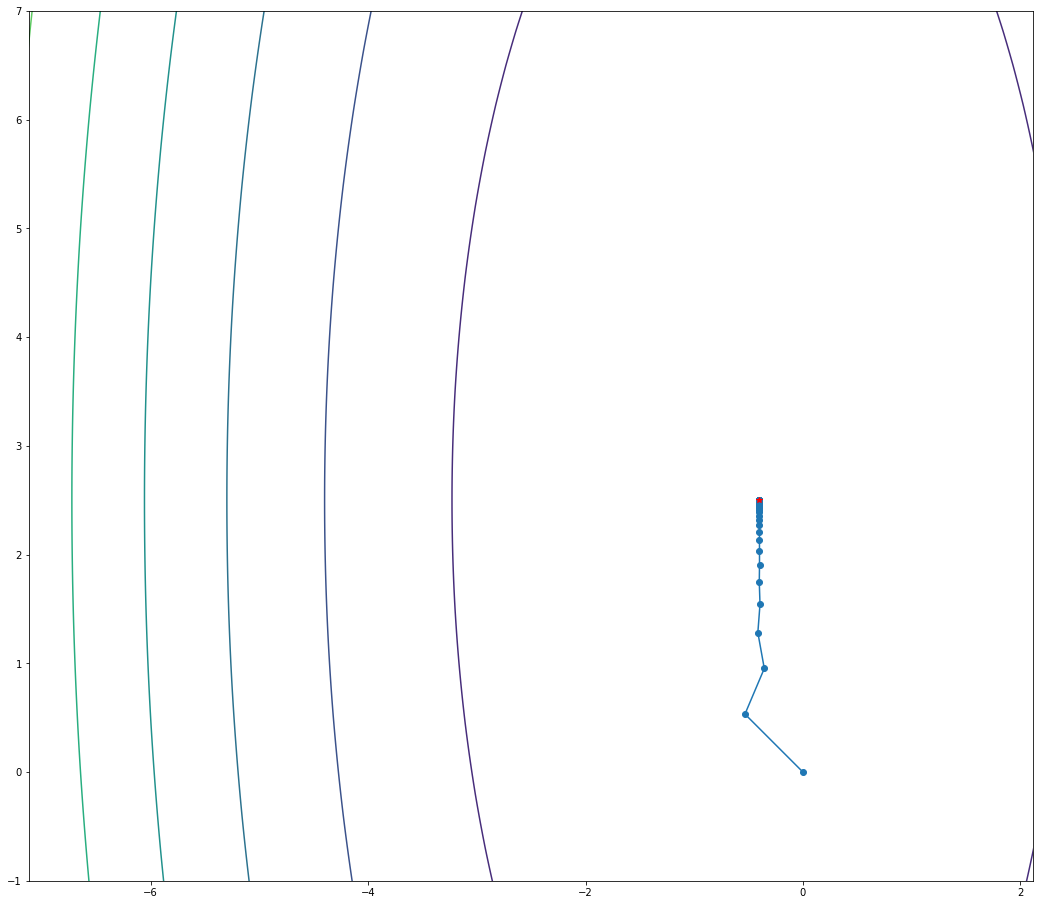

In [0]:
def smooth_least_squares(A, y):
  # TODO: Find maximum eigenvalue of A
  M = max(np.linalg.eigvals(A.T @ A))
  iterations = 65526
  xs = [np.zeros(A.shape[1])]
  suboptimality = []
  for i in range(iterations):
    if (i % 10000 == 0):
      print("\r{}".format(i), end='')
    gradient = 0            # TODO: Find the gradient.
    xs.append(xs[-1] - 0)   # TODO: Write the correct update. Experiment with step sizes to see what happens 
    suboptimality.append(np.linalg.norm(A @ xs[-1] - y)**2 / 2)
  print("\r{}".format(i))
  return xs[-1], xs, i, suboptimality

def plot_2d_solution(A, xs, d):
  xs = np.array(xs)
  Apinv = np.linalg.pinv(A)
  x_star = Apinv @ d
  x, y = np.linspace(-8, 3, 151), np.linspace(-2, 8, 151)
  X, Y = np.array(np.meshgrid(x, y))
  Z = np.zeros([x.size, y.size])
  for i, a in enumerate(x):
    for j, b in enumerate(y):
        Z[j, i] = np.linalg.norm(A @ [a, b] - d)**2 / 2
  fig = plt.figure(figsize=(18, 16))
  plt.contour(x, y, Z)
  print(xs.shape)
  plt.plot(xs[:, 0], xs[:, 1], "o-")
  plt.plot(xs[-1, 0], xs[-1, 1], "r*")
  plt.axis('equal')
  plt.axis([-7, 2, -1, 7])
  plt.show()

B = np.array([[1.0, 0.0], [0.0, 1.0]])
b = np.array([-2, 5])
x, xs, iterations, suboptimality = smooth_least_squares(B, b)
plot_2d_solution(B, xs, b)

C = np.array([[5, 0], [0, 2]])
x, xs, iterations, suboptimality = smooth_least_squares(C, b)
plot_2d_solution(C, xs, b)


In [0]:
# Optional: Plot cost vs iterations for different step sizes.
#           What do you observe?
#           Can you think of any modification that would make the gradient descent converge faster?